In [69]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [70]:
df=pd.read_csv("Customer-Churn.CSV")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [43]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [72]:
df.isnull().any().any()


False

In [73]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors="coerce")
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [76]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [ ]:

df['churn'] = (df['churn'] == 'yes').astype(int)


binary_cols = ['partner', 'dependents', 'phoneservice', 'paperlessbilling']
for col in binary_cols:
    df[col] = (df[col] == 'yes').astype(int)


internet_cols = ['onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'multiplelines']
for col in internet_cols:
    df[col] = df[col].replace({'No internet service':'No', 'No phone service':'No'})
    df[col] = (df[col] == 'yes').astype(int)


df['gender'] = (df['gender'] == 'male').astype(int)



In [78]:
df['contract'] = df['contract'].map({'month-to-month':0, 'one_year':1,'two_year':2})

In [79]:
df = pd.get_dummies(df, columns=['paymentmethod'], prefix='payment', drop_first=True)


In [80]:
df = pd.get_dummies(df, columns=['internetservice'], prefix='service', drop_first=True)

In [83]:
df = df.drop('customerid', axis=1)

In [84]:
df.head().T

,0,1,2,3,4
gender,0,1,1,1,0
seniorcitizen,0,0,0,0,0
partner,1,0,0,0,0
dependents,0,0,0,0,0
tenure,1,34,2,45,2
phoneservice,0,1,1,0,1
multiplelines,0,0,0,0,0
onlinesecurity,0,1,1,1,0
onlinebackup,1,0,1,0,0
deviceprotection,0,1,0,1,0


In [85]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())   
    print("-" * 40)

Column: gender
[0 1]
----------------------------------------
Column: seniorcitizen
[0 1]
----------------------------------------
Column: partner
[1 0]
----------------------------------------
Column: dependents
[0 1]
----------------------------------------
Column: tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
----------------------------------------
Column: phoneservice
[0 1]
----------------------------------------
Column: multiplelines
[0 1]
----------------------------------------
Column: onlinesecurity
[0 1]
----------------------------------------
Column: onlinebackup
[1 0]
----------------------------------------
Column: deviceprotection
[0 1]
----------------------------------------
Column: techsupport
[0 1]
----------------------------------------
Column: streamingtv
[0 1]
--------------------

In [86]:
from sklearn.model_selection import train_test_split


In [87]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)


In [88]:
y_train = df_train.churn.values
y_val = df_val.churn.values

In [89]:
del df_train['churn']
del df_val['churn']

Validation Accuracy: 0.7866

Confusion Matrix:
[[1224  150]
 [ 247  239]]


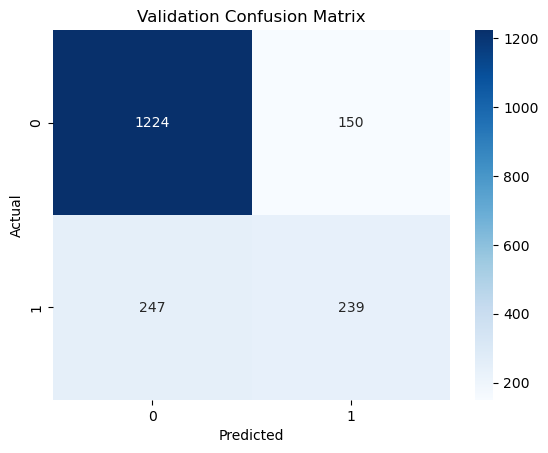


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1374
           1       0.61      0.49      0.55       486

    accuracy                           0.79      1860
   macro avg       0.72      0.69      0.70      1860
weighted avg       0.78      0.79      0.78      1860



In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(df_train, y_train)  


y_val_pred = model.predict(df_val)

accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy:.4f}")


cm = confusion_matrix(y_val, y_val_pred)
print("\nConfusion Matrix:")
print(cm)


sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()


print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))
